### set folder_name and day session to analyze

In [1]:
name = 'ANB2'
session = '20231211_d22'

### imports

In [2]:
from scipy import io
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import statistics
import re
import glob
import scipy.signal as signal
import pickle

from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.align_times import get_leverdata_indices
from preprocess_leverdata.get_trial_frequencies import get_trial_frequencies
from preprocess_leverdata.butterworth_filter_leverdata import butterworth_filter_leverdata
from preprocess_leverdata.rescale_leverdata import rescale_leverdata
from preprocess_leverdata.view_processed_trial_FFT import view_processed_trial_FFT
from preprocess_leverdata.calculate_leverdata_sample_times import calculate_leverdata_sample_times

### Setup folders and matfiles

In [3]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscrimination/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

output_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
leverdata_matfile = "../Data_Copy/LeverData/"+name+"/LeverData_"+name+"_"+session+".mat"

respMTX shape: (176, 7)
MTXTrialType shape: (1000, 5)
number of trials: 176


In [4]:
open(leverdata_matfile)

<_io.TextIOWrapper name='../Data_Copy/LeverData/ANB2/LeverData_ANB2_20231211_d22.mat' mode='r' encoding='UTF-8'>

For mac:

In [5]:
!mkdir {output_folder}

For windows:

In [225]:
!mkdir "{output_folder}"

mkdir: ../Data_Copy/AnalysisData/ANB1/PreprocessLeverData_ANB1_20231211_d21/: File exists


preview trials

In [6]:
np.set_printoptions(suppress = True,
   formatter = {'float_kind':'{:f}'.format})
print(np.hstack((respMTX[1:101, 0:1]-respMTX[0:100, 0:1], np.array([np.linspace(0, 99, 100)]).transpose())))

[[5.280805 0.000000]
 [15.010377 1.000000]
 [14.963351 2.000000]
 [5.299437 3.000000]
 [15.119566 4.000000]
 [14.909705 5.000000]
 [15.054330 6.000000]
 [2.866212 7.000000]
 [14.762155 8.000000]
 [14.935502 9.000000]
 [15.108762 10.000000]
 [15.115577 11.000000]
 [19.915828 12.000000]
 [13.959758 13.000000]
 [24.454676 14.000000]
 [9.961265 15.000000]
 [54.695160 16.000000]
 [19.079185 17.000000]
 [22.703344 18.000000]
 [31.149923 19.000000]
 [16.205536 20.000000]
 [15.397016 21.000000]
 [68.220478 22.000000]
 [53.908260 23.000000]
 [43.372614 24.000000]
 [25.158300 25.000000]
 [22.400332 26.000000]
 [24.694195 27.000000]
 [40.896656 28.000000]
 [8.658623 29.000000]
 [22.196605 30.000000]
 [38.377262 31.000000]
 [12.655225 32.000000]
 [3.473887 33.000000]
 [9.681956 34.000000]
 [8.589798 35.000000]
 [26.291635 36.000000]
 [11.543981 37.000000]
 [17.391640 38.000000]
 [15.191537 39.000000]
 [6.183051 40.000000]
 [5.297962 41.000000]
 [15.038477 42.000000]
 [14.899743 43.000000]
 [17.395

### Run leverdata2binary.cpp to create binary files for each trial from `lever_data` in the LeverData .mat file

In [8]:
!./preprocess_leverdata/leverdata2binary {output_folder} {leverdata_matfile} 23861

leverdata from .mat size: 72000000,72000000
leverdata from .mat rank: 2
leverdata vector size: 72000000
leverdata vector with unused rows taken out size: 21345095
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231211_d22/full.bin
finished a trialITI: 54926 index:0 trialITI length: 31065 samples = ~5s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231211_d22/trial0.bin
finished a trialITI: 143222 index:1 trialITI length: 88296 samples = ~14s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231211_d22/trial1.bin
finished a trialITI: 231244 index:2 trialITI length: 88022 samples = ~14s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231211_d22/trial2.bin
finished a trialITI: 262410 index:3 trialITI length: 31166 samples = ~5s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231211_d22/trial3.bin
finished a trial

change `num_trials` if seems like `lever_data` stopped before behavior (if total trials detected is less than `num_trials` from `respMTX`)

In [11]:
num_trials = 176

### Look at sampling rates for the `lever_data`

In [10]:
dts, trial_frequencies = get_trial_frequencies(num_trials, respMTX, output_folder)

Trial  0
Duration in MATLAB seconds from respMTX:  5.2808054
Number of leverdata samples:  31065
Estimated freq:  5882.625404071886
Trial  1
Duration in MATLAB seconds from respMTX:  15.010377499999999
Number of leverdata samples:  88296
Estimated freq:  5882.330407746242
Trial  2
Duration in MATLAB seconds from respMTX:  14.963350500000004
Number of leverdata samples:  88022
Estimated freq:  5882.506060390684
Trial  3
Duration in MATLAB seconds from respMTX:  5.299437099999999
Number of leverdata samples:  31166
Estimated freq:  5881.001965284201
Trial  4
Duration in MATLAB seconds from respMTX:  15.119566200000001
Number of leverdata samples:  88945
Estimated freq:  5882.774599710407
Trial  5
Duration in MATLAB seconds from respMTX:  14.909704899999994
Number of leverdata samples:  87703
Estimated freq:  5882.276046925653
Trial  6
Duration in MATLAB seconds from respMTX:  15.054330100000001
Number of leverdata samples:  88554
Estimated freq:  5882.294290863198
Trial  7
Duration in MA

So if estimated frequencies are not all around 5882 Hz, then trials probably aren't aligned. Make sure files are correct, and try increasing the skipped samples in for the C++ trial detection program. Also make sure the statistics are all between 4500 and 5900.

### low pass Butterworth filter `lever_data` with a cutoff frequency of 40 Hz

Assuming electrical noise will be around 60 Hz

In [12]:
cutoff_frequency = 40
butterworth_filter_leverdata(output_folder, num_trials, cutoff_frequency)

### Rescale the filtered_lever_data to 0-5V from 0-1023 analogRead values

In [13]:
rescale_leverdata(output_folder, num_trials)

### Calculate sample time values for each sample based on trial start times

In [14]:
calculate_leverdata_sample_times(output_folder, respMTX, num_trials)

### Get tone and leverpress sample indicies

In [15]:
get_leverdata_indices(output_folder, respMTX, num_trials)

### Check the FFT power spectrum for one of the trials

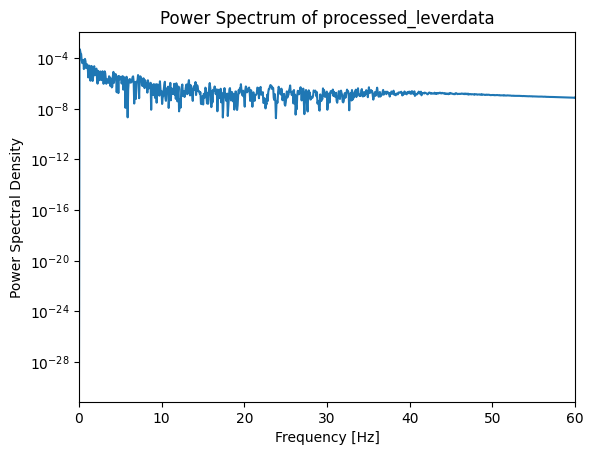

In [16]:
# set which trial to look at
trial_index = 10
view_processed_trial_FFT(trial_index, output_folder)